In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [2]:
dir = "./bench_res_zpwak09i/"
# dir = "./tmp_res/"
# dir = "./bench_res/"
files = list(
    filter(
        lambda x: x.endswith(".json"),
        os.listdir(dir)
    )
)

res = {}

for path in files:
    mode = path[:path.find(".")]
    path = dir + path

    file = open(path, "r")
    data = json.load(file)
    file.close()

    print(mode)
    if len(data) != 0:
        res[mode] = data

print(list(res.keys()))

EIGEN_SHARE_PROXY
OMP_DYNAMIC_MONOTONIC
EIGEN_MAILBOX
OMP_STATIC
EIGEN_PROXY_STEALING
OMP_GUIDED_MONOTONIC
EIGEN_MAILBOX_JE
EIGEN_TWEAKED
TBB_AUTO
TBB_CONST_AFFINITY
EIGEN_TIMESPAN_GRAINSIZE
EIGEN_SIMPLE
TBB_AFFINITY
EIGEN_PAR_DO_SHARE
EIGEN_FOLDED_SHARING
OMP_GUIDED_NONMONOTONIC
EIGEN_PAR_DO_STEAL
OMP_DYNAMIC_NONMONOTONIC
EIGEN_PROXY_SHARING
TBB_SIMPLE
['EIGEN_SHARE_PROXY', 'OMP_DYNAMIC_MONOTONIC', 'EIGEN_MAILBOX', 'OMP_STATIC', 'EIGEN_PROXY_STEALING', 'OMP_GUIDED_MONOTONIC', 'EIGEN_MAILBOX_JE', 'EIGEN_TWEAKED', 'TBB_AUTO', 'TBB_CONST_AFFINITY', 'EIGEN_TIMESPAN_GRAINSIZE', 'EIGEN_SIMPLE', 'TBB_AFFINITY', 'EIGEN_PAR_DO_SHARE', 'EIGEN_FOLDED_SHARING', 'OMP_GUIDED_NONMONOTONIC', 'EIGEN_PAR_DO_STEAL', 'OMP_DYNAMIC_NONMONOTONIC', 'EIGEN_PROXY_SHARING', 'TBB_SIMPLE']


In [3]:
by_bench = {}

for exec, data in res.items():
    for bench, bench_res in data.items():
        if bench not in by_bench:
            by_bench[bench] = {exec: bench_res}
        else:
            by_bench[bench][exec] = bench_res

del by_bench["rangeQuery2d/parallelPlaneSweep"]
by_bench

{'integerSort/parallelRadixSort': {'EIGEN_SHARE_PROXY': {'mins': 0.078,
   'total': 0.079},
  'OMP_DYNAMIC_MONOTONIC': {'mins': 0.104, 'total': 0.104},
  'OMP_STATIC': {'mins': 0.116, 'total': 0.119},
  'EIGEN_PROXY_STEALING': {'mins': 0.078, 'total': 0.079},
  'OMP_GUIDED_MONOTONIC': {'mins': 0.102, 'total': 0.11},
  'EIGEN_MAILBOX_JE': {'mins': 0.087, 'total': 0.088},
  'EIGEN_TWEAKED': {'mins': 0.081, 'total': 0.081},
  'TBB_AUTO': {'mins': 0.085, 'total': 0.086},
  'TBB_CONST_AFFINITY': {'mins': 0.086, 'total': 0.087},
  'EIGEN_TIMESPAN_GRAINSIZE': {'mins': 0.453, 'total': 0.476},
  'EIGEN_SIMPLE': {'mins': 0.606, 'total': 0.635},
  'TBB_AFFINITY': {'mins': 0.086, 'total': 0.086},
  'EIGEN_PAR_DO_SHARE': {'mins': 0.078, 'total': 0.079},
  'EIGEN_FOLDED_SHARING': {'mins': 0.135, 'total': 0.142},
  'OMP_GUIDED_NONMONOTONIC': {'mins': 0.101, 'total': 0.103},
  'EIGEN_PAR_DO_STEAL': {'mins': 0.079, 'total': 0.08},
  'EIGEN_PROXY_SHARING': {'mins': 0.081, 'total': 0.082},
  'TBB_SIMPLE'

In [4]:
by_bench['histogram/parallel']
np.min([val["total"] for val in by_bench['histogram/parallel'].values()])

0.046

In [18]:
def filter_exec(exec_name: str) -> bool:
    # return exec_name.startswith("EIGEN_") and exec_name != "EIGEN_SIMPLE"
    # return (not (
    #     exec_name.startswith("OMP_DYNAMIC_")
    #     or exec_name.startswith("EIGEN_")
    #     or exec_name == "TBB_AFFINITY"
    #     # or exec_name.startswith("EIGEN_FOLDED")
    # )
    # or exec_name.startswith("EIGEN_TIMESPAN_")
    return (exec_name.startswith("EIGEN_FOLDED_SHARING")
    # or exec_name.startswith("EIGEN_FOLDED_SHARING")
    or exec_name.startswith("EIGEN_MAILBOX_JE")
    # or exec_name.startswith("EIGEN_RAPID")
    )

results = {}

for bench, data in by_bench.items():
    execs = list(filter(filter_exec, data.keys()))
    print(execs)
    bench_res = np.array([data[exec]["total"] for exec in execs])

    results[bench] = {
        "execs": execs,
        "bench_res": bench_res
    }

data = results

['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE', 'EIGEN_FOLDED_SHARING']
['EIGEN_MAILBOX_JE']


In [27]:
target_execs = {
    "EIGEN_MAILBOX_JE": True,
    "EIGEN_RAPID": True,
}
target_execs = {
    "EIGEN_FOLDED_SHARING": True,
    # "EIGEN_TIMESPAN_GRAINSIZE": True,
    "EIGEN_MAILBOX_JE": True,
}

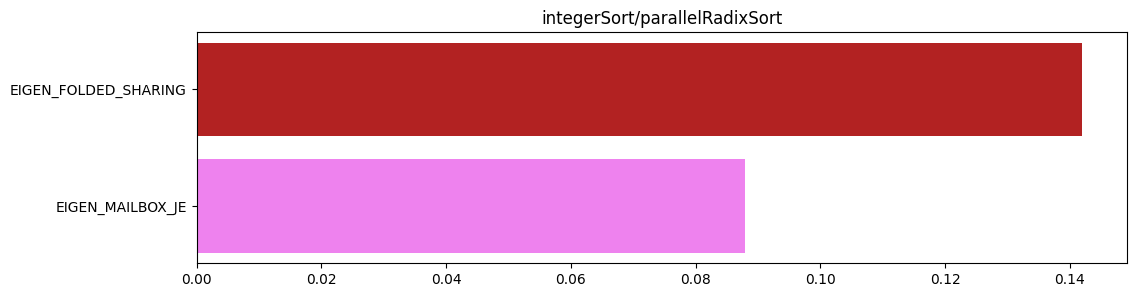

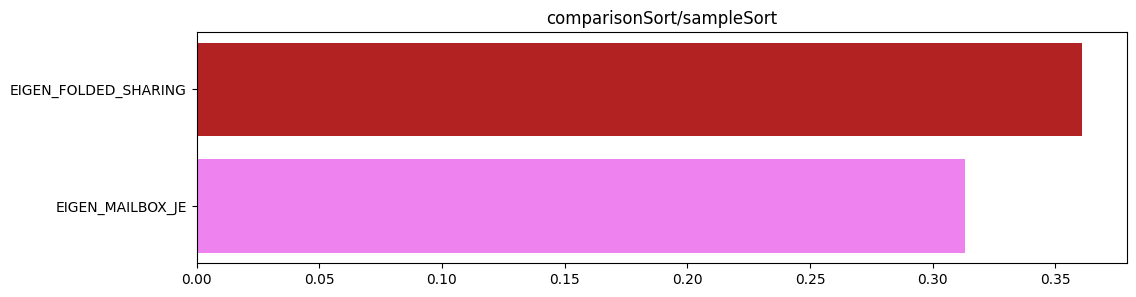

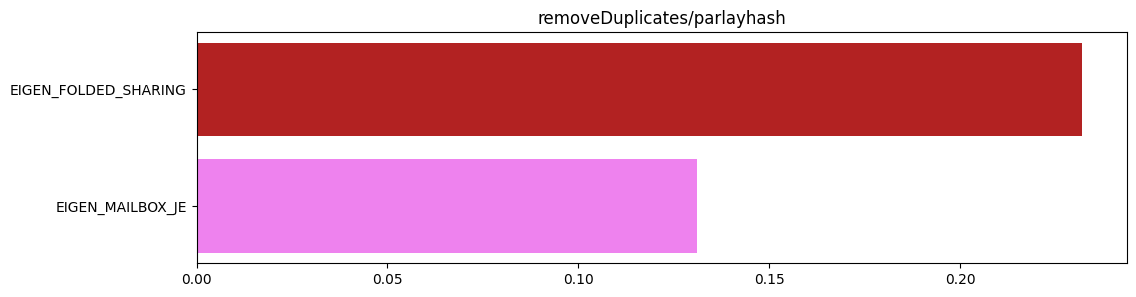

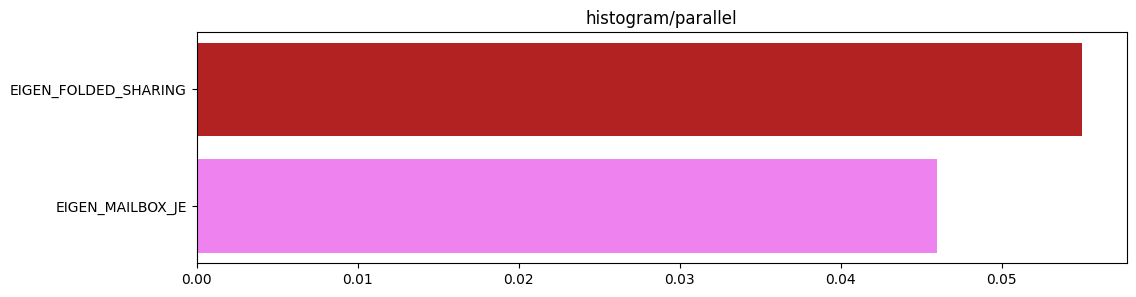

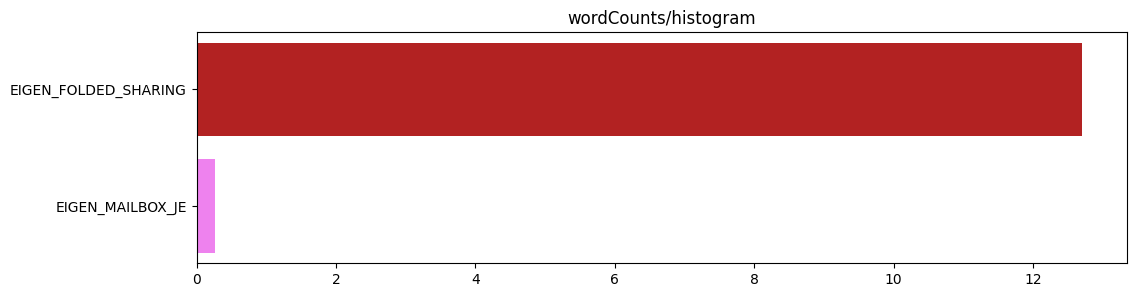

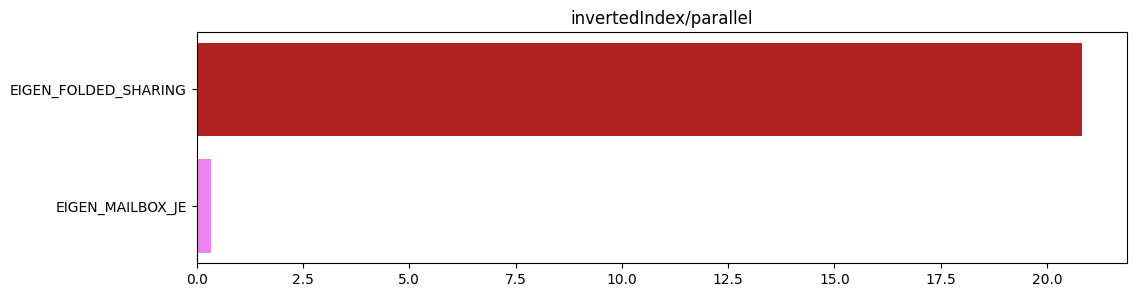

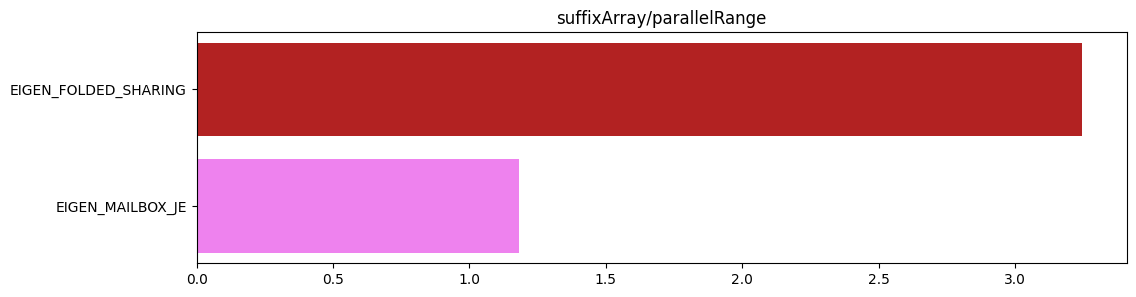

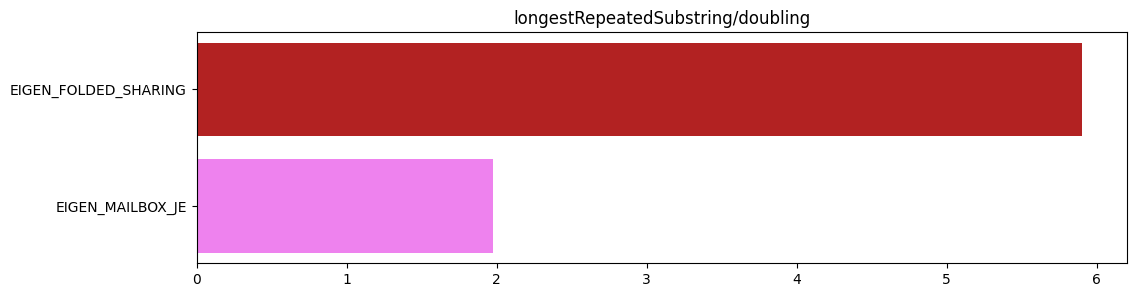

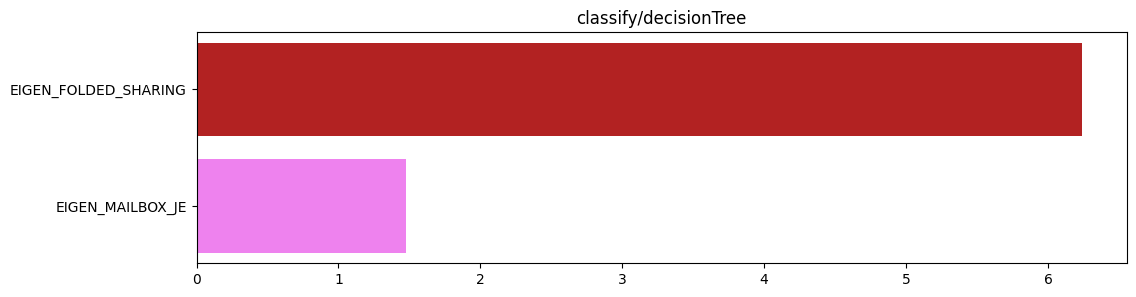

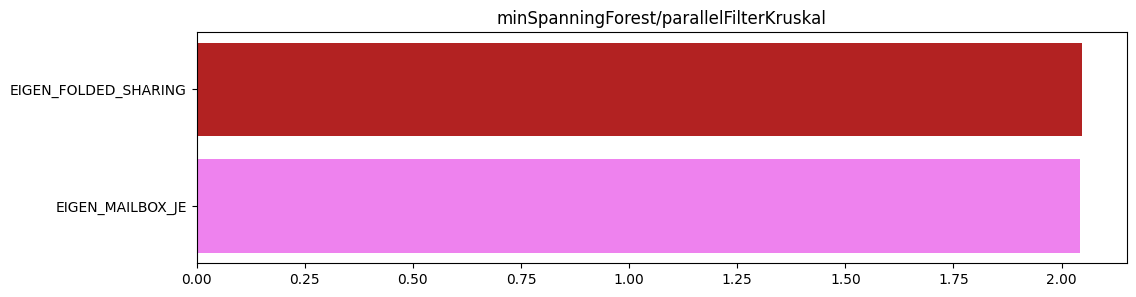

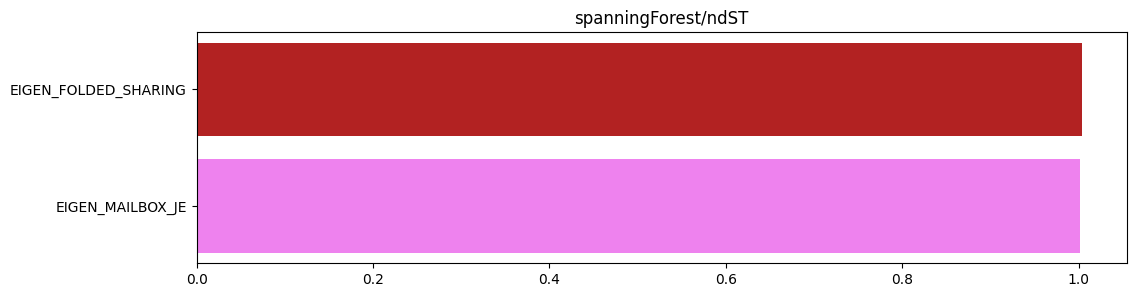

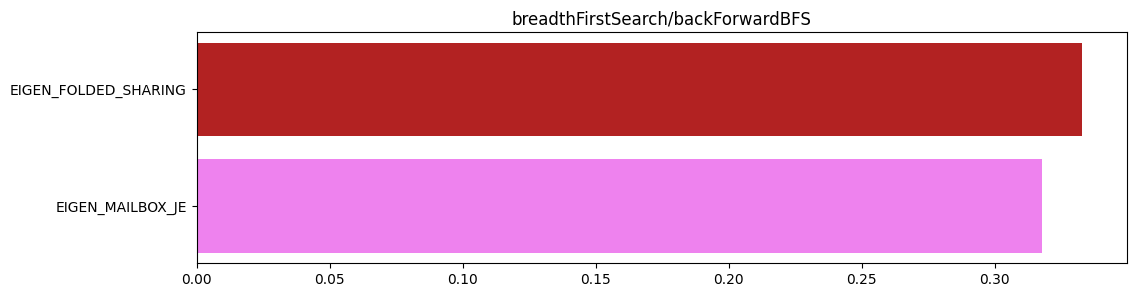

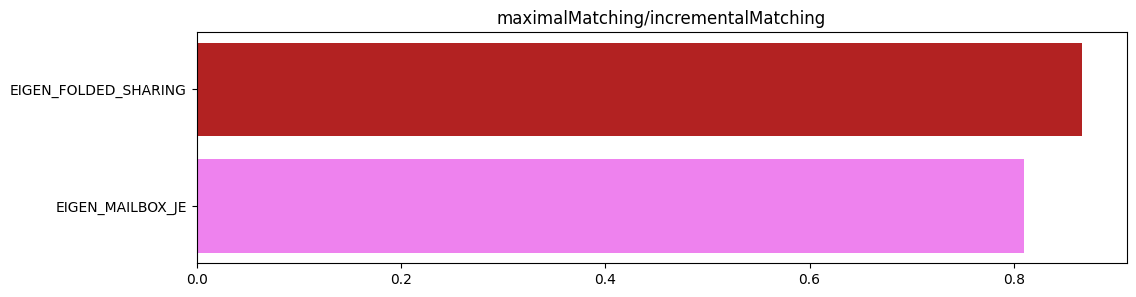

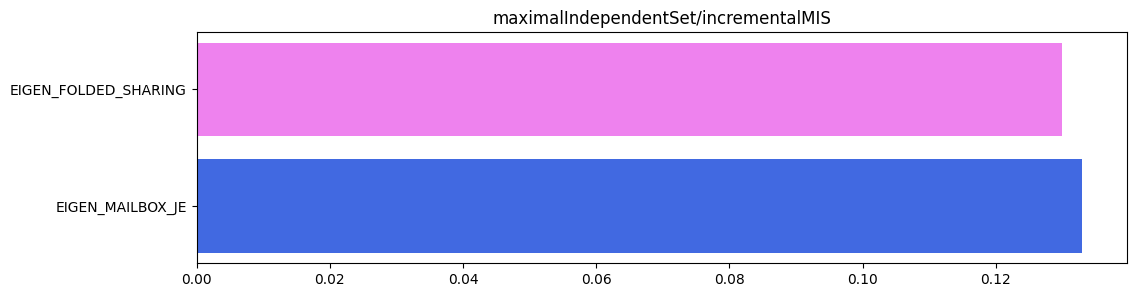

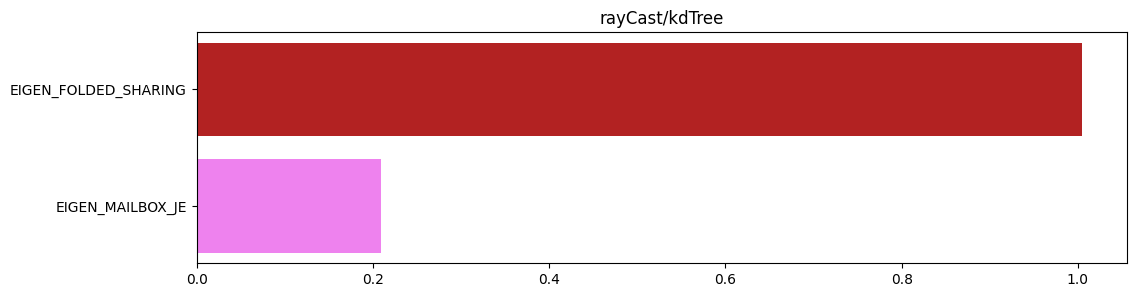

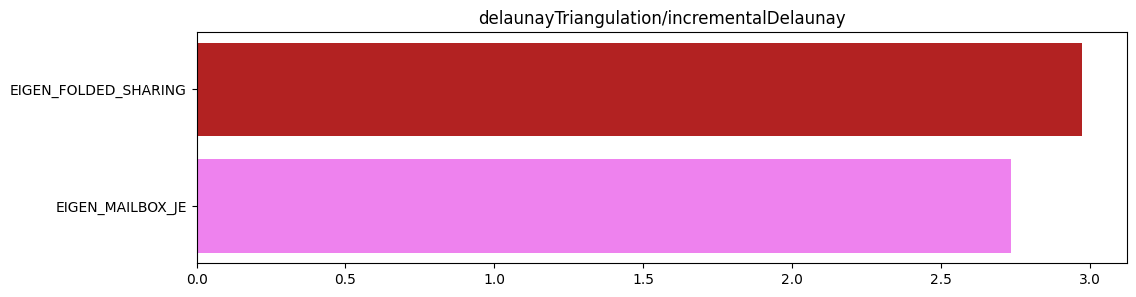

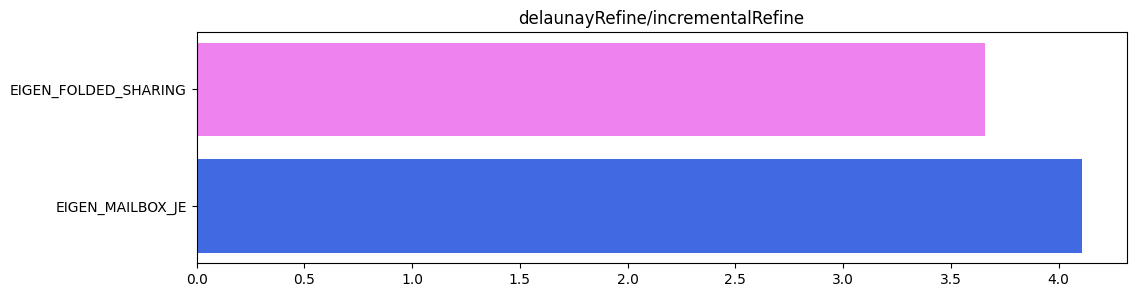

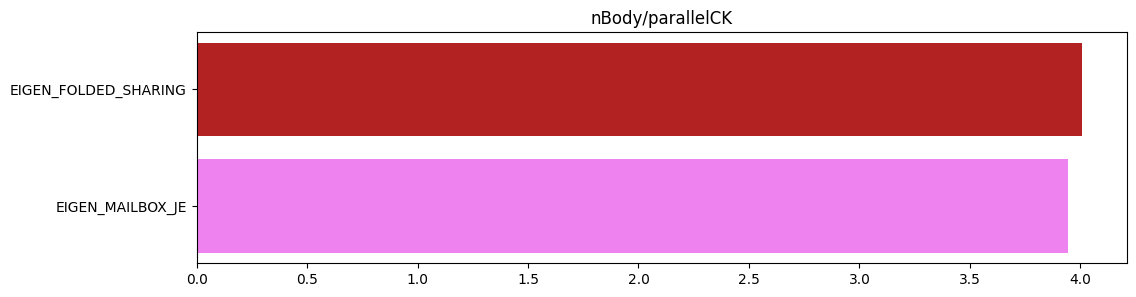

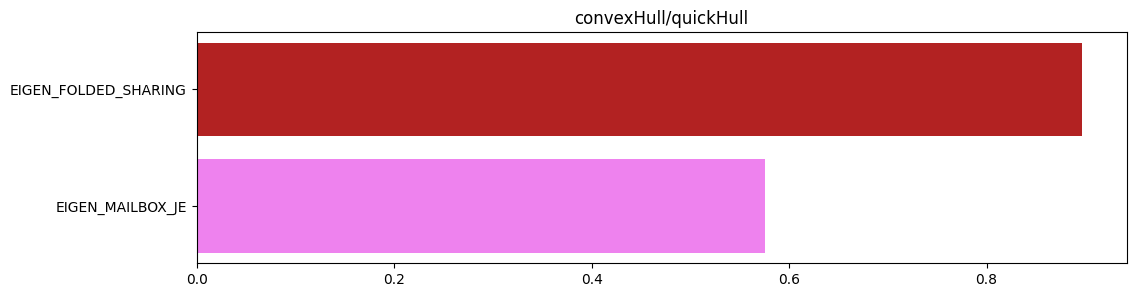

In [28]:
base_exec = "TBB_AUTO"
base_exec = "EIGEN_MAILBOX_JE"
curr_target = "EIGEN_FOLDED_SHARING"

def color_by_exec(exec_name: str, value: float, base: float = 1.) -> str:
    if exec_name == base_exec:
        return 'royalblue'
    elif exec_name in target_execs and target_execs[exec_name]:
        if value < base:
            return 'forestgreen'
        elif value > base:
            return 'firebrick'
        else:
            return 'gold'
    else:
        return 'gray'

for bench, bench_data in results.items():
    execs = bench_data["execs"]
    bench_res = bench_data["bench_res"]

    base_idx = None
    tgt_idx = None
    for i in range(len(execs)):
        if execs[i] == base_exec:
            base_idx = i
        if execs[i] == curr_target:
            tgt_idx = i
        if base_idx is not None and tgt_idx is not None:
            break

    if base_idx is None or tgt_idx is None:
        continue
    base = bench_res[base_idx]
    # bench_res = bench_res / base
    colors = [color_by_exec(exec, value, base) for (exec, value) in zip(execs, bench_res)]
    colors[np.argmin(bench_res)] = 'violet'

    fig, ax = plt.subplots(figsize=(12, 3))

    bars = ax.barh(execs, bench_res, color=colors)

    graph_bottom = bars.patches[0].xy[1]
    graph_top = bars.patches[-1].xy[1] + bars.patches[-1].get_height()
    # ax.plot([1., 1.], [graph_bottom, graph_top], dashes=[6, 2], color = 'black')
    ax.set_title(bench)
    fig.savefig(f"imgs/{bench.replace('/', '-')}.jpg", bbox_inches="tight")

In [29]:
import seaborn as sns
import pandas as pd

In [30]:
benches = list(results.keys())
execs = list(map(lambda key: results[key]['execs'], results))[0]
data = list(map(lambda key: results[key]['bench_res'], results))

df = pd.DataFrame(data, index=benches, columns=execs)
norm_df = df.div(df.max(axis=1), axis=0)
norm_df

,EIGEN_MAILBOX_JE,EIGEN_FOLDED_SHARING
integerSort/parallelRadixSort,0.619718,1.000000
comparisonSort/sampleSort,0.867036,1.000000
removeDuplicates/parlayhash,0.564655,1.000000
histogram/parallel,0.836364,1.000000
wordCounts/histogram,0.020933,1.000000
invertedIndex/parallel,0.016467,1.000000
suffixArray/parallelRange,0.363720,1.000000
longestRepeatedSubstring/doubling,0.335196,1.000000
classify/decisionTree,0.236943,1.000000
minSpanningForest/parallelFilterKruskal,0.997559,1.000000


<Axes: >

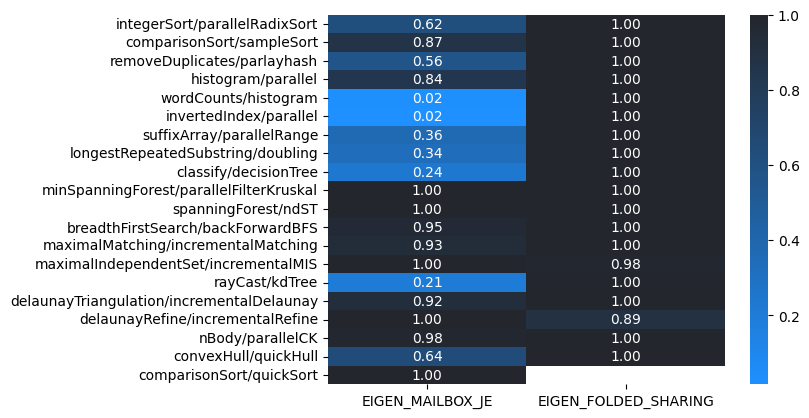

In [31]:
sns.heatmap(norm_df, annot=True, fmt=".2f", cbar=True, cmap=sns.color_palette("dark:dodgerblue_r", as_cmap=True))

In [32]:
bests = []
for bench, bench_data in results.items():
    execs = bench_data["execs"]
    bench_res = bench_data["bench_res"]

    bests.append(execs[np.argmin(bench_res)])

In [33]:
sad_benches = {}
good_benches = {}

for bench, bench_data in by_bench.items():
    for target in target_execs.keys():
        if target not in bench_data or base_exec not in bench_data:
            continue
        if bench_data[target]["total"] > bench_data[base_exec]["total"]:
            if target in sad_benches:
                sad_benches[target].append(bench)
            else:
                sad_benches[target] = [bench]
        else:
            if target in good_benches:
                good_benches[target].append(bench)
            else:
                good_benches[target] = [bench]

for sched, curr_benches in sad_benches.items():
    print(f"{sched} good/sad: {len(good_benches[sched])} / {len(curr_benches)}")

EIGEN_FOLDED_SHARING good/sad: 2 / 17


Text(0.5, 1.0, 'number of 1st places in benches')

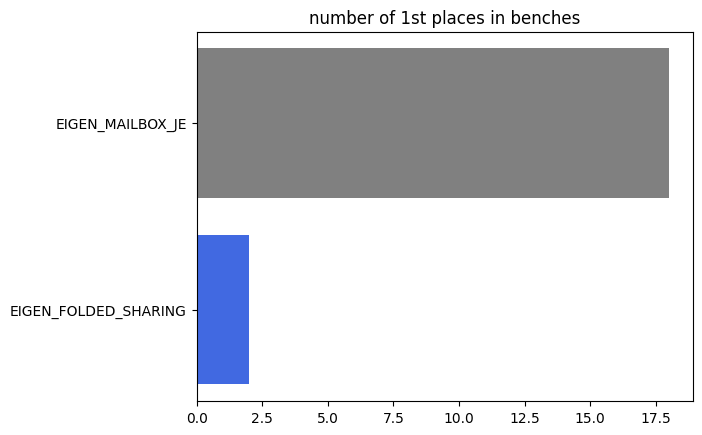

In [34]:
def color_for_best(exec_name: str) -> str:
    if exec_name == curr_target:
        return 'royalblue'
    return "gray"

scheds, counts = np.unique(bests, return_counts=True)
plt.barh(scheds, counts, color=list(map(color_for_best, scheds)))
plt.title("number of 1st places in benches")